### Stake Exchange for Data Science

In the Stack Exchange for Data Science, we can see that each question has the date and time when the question was asked, along with the user who posted the question. Each question has multiple tags.

It also total votes to the question and votes to all answers.

In the Query section of Stack Exchange's Data Science, `Tags`, `Posts`, `PostTags` and `TagSynonym` appears promising for our analysis. 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
questions = pd.read_csv(
    '2019_questions.csv', parse_dates = ['CreationDate']
)

questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [35]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


#### Missing Values:
There are 7432 missing values in the `FavouriteCount` column. Other than that, no other column has any missing values. The missing values in this column can be exchanged with zeros.

#### Type of Column:
All columns are correct, except the `Tags` column is an object type.

In [36]:
questions['FavoriteCount'] = questions['FavoriteCount'].fillna(0).astype(int)
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,0
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,0
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,0
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,0
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,0


In [37]:
questions['Tags'] = questions['Tags'].str.replace(
    '<', '').str.replace(
    '>', ',').str.split(',')
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [38]:
tag_count = dict()

for lists in questions['Tags']:
    for tag in lists:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
            
tag_count

{'': 8839,
 '.net': 1,
 '3d-object-detection': 1,
 '3d-reconstruction': 9,
 'ab-test': 6,
 'accuracy': 89,
 'activation': 1,
 'activation-function': 44,
 'active-learning': 4,
 'activity-recognition': 5,
 'actor-critic': 21,
 'adaboost': 1,
 'aggregation': 12,
 'ai': 25,
 'alex-net': 5,
 'algorithms': 68,
 'allennlp': 2,
 'amazon-ml': 1,
 'anaconda': 20,
 'ann': 2,
 'annotation': 12,
 'anomaly': 4,
 'anomaly-detection': 92,
 'anonymization': 3,
 'anova': 2,
 'apache-hadoop': 13,
 'apache-nifi': 1,
 'apache-spark': 35,
 'arima': 11,
 'association-rules': 19,
 'attention-mechanism': 26,
 'auc': 3,
 'audio-recognition': 25,
 'autoencoder': 106,
 'automatic-summarization': 10,
 'automation': 4,
 'automl': 2,
 'aws': 20,
 'aws-lambda': 2,
 'azure-ml': 12,
 'backpropagation': 65,
 'batch-normalization': 29,
 'bayes-error': 1,
 'bayesian': 40,
 'bayesian-networks': 12,
 'bayesian-nonparametric': 2,
 'beginner': 27,
 'bert': 64,
 'bias': 19,
 'bigdata': 95,
 'binary': 26,
 'bioinformatics': 4,

In [39]:
counting = pd.DataFrame.from_dict(tag_count, orient = 'index')
counting = counting.rename(columns = {0 : 'Count'})
counting = counting.sort_values('Count', ascending= False)
counting

,Count
,8839
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493


In [40]:
most_used = counting.iloc[1:21]
most_used


,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


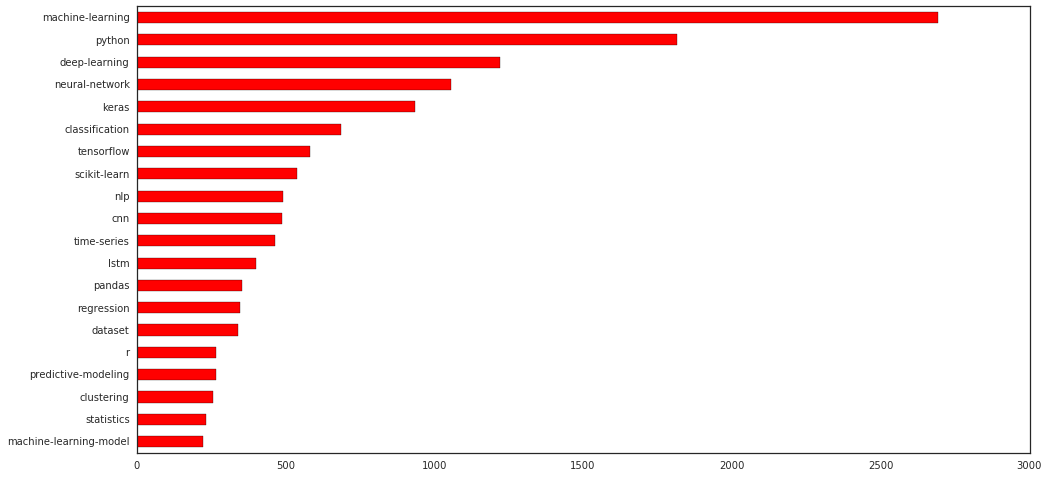

In [41]:
most_used = most_used.sort_values('Count')
sns.set_style('white')
most_used.plot(kind = 'barh',figsize=(16,8), legend = False, color='Red')



In [42]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row["ViewCount"]
            
most_view_total = pd.DataFrame.from_dict(tag_view_count, orient= 'index')
most_view_total = most_view_total.rename(columns= {0:'ViewCount'})
most_viewed = most_view_total.sort_values('ViewCount').iloc[-21:-1]
most_viewed

,ViewCount
clustering,33928
csv,38654
pytorch,40240
dataset,43151
regression,49451
numpy,49767
time-series,64134
cnn,70349
nlp,71382
lstm,74458


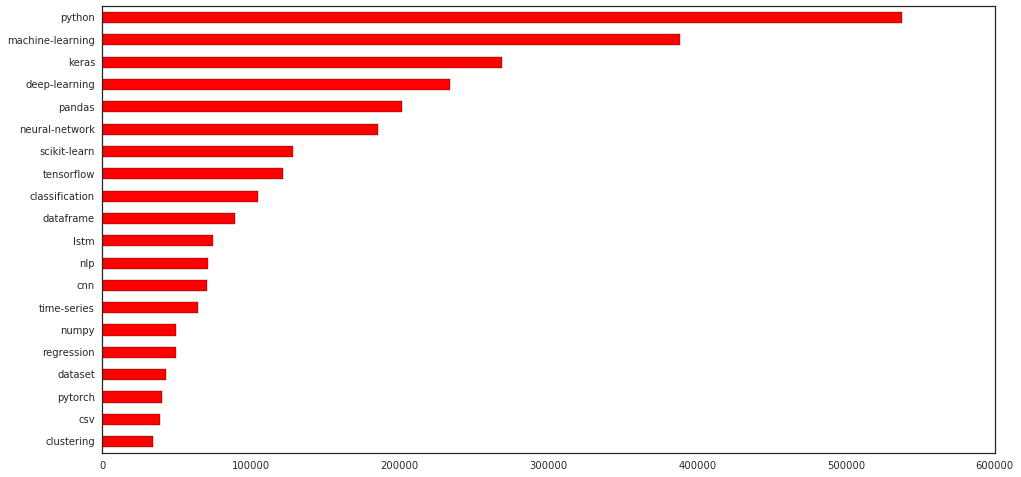

In [43]:
most_viewed.plot(kind = 'barh',figsize=(16,8), legend = False, color='Red')

In [47]:
all_questions = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])
all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


In [48]:
all_questions

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...
5,45428,2019-02-12 05:43:18,<cnn>
6,45430,2019-02-12 06:20:30,<machine-learning><learning>
7,45431,2019-02-12 07:26:56,<machine-learning>
8,45433,2019-02-12 08:56:23,<python><keras><tensorflow><lstm>
9,45434,2019-02-12 09:09:01,<neural-network><feature-selection><mlp>


In [49]:
all_questions["Tags"] = all_questions["Tags"].str.replace("^<|>$", "").str.split("><")
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


In [51]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
        else:
            return 0
        
all_questions['Deep_learning'] = all_questions['Tags'].apply(class_deep_learning)
all_questions

,Id,CreationDate,Tags,Deep_learning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
5,45428,2019-02-12 05:43:18,[cnn],1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0
7,45431,2019-02-12 07:26:56,[machine-learning],0
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",0
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1


In [52]:
all_questions['Deep_learning'].value_counts()

0    17841
1     3735
Name: Deep_learning, dtype: int64

In [54]:
time = all_questions['CreationDate'][all_questions['Deep_learning'] == 1]
time

1       2019-02-12 00:50:39
3       2019-02-12 04:51:49
5       2019-02-12 05:43:18
9       2019-02-12 09:09:01
18      2019-02-12 14:33:37
22      2019-02-12 17:15:05
36      2019-02-13 06:35:55
39      2019-02-13 07:56:33
45      2019-02-13 10:49:48
47      2019-02-13 12:00:29
48      2019-02-13 12:14:24
49      2019-02-13 12:49:24
63      2019-02-13 18:33:05
108     2018-08-16 12:08:53
118     2018-08-16 19:30:54
121     2018-08-16 23:49:54
122     2018-08-17 00:10:07
136     2018-08-17 18:26:14
140     2018-08-17 21:53:57
141     2018-08-17 23:01:13
144     2018-08-18 01:30:51
145     2018-08-18 02:01:49
157     2019-07-10 15:36:48
159     2019-07-10 15:54:52
165     2019-07-10 21:11:08
168     2019-07-10 23:37:44
170     2019-07-08 15:42:43
178     2019-07-11 10:11:21
184     2019-07-11 14:16:52
194     2019-07-11 20:28:22
                ...        
21470   2018-08-09 15:17:59
21476   2018-08-09 18:36:56
21480   2018-08-10 00:26:22
21481   2018-08-10 03:30:25
21482   2018-08-10 0

In [75]:
time_per = time.dt.year.astype(str) + '_' + time.dt.month.astype(str)
time_ser = pd.DataFrame(time_per.value_counts().sort_index())
time_ser = time_ser.rename(columns = {'CreationDate': 'DL_questions'})
time_ser

,DL_questions
2014_10,1
2014_11,1
2014_12,2
2014_5,1
2014_6,2
2014_7,4
2015_10,2
2015_11,5
2015_12,12
2015_2,1


In [67]:
total_time = all_questions['CreationDate']
total_time

0       2019-02-12 00:36:29
1       2019-02-12 00:50:39
2       2019-02-12 04:40:51
3       2019-02-12 04:51:49
4       2019-02-12 05:08:24
5       2019-02-12 05:43:18
6       2019-02-12 06:20:30
7       2019-02-12 07:26:56
8       2019-02-12 08:56:23
9       2019-02-12 09:09:01
10      2019-02-12 09:41:33
11      2019-02-12 09:47:13
12      2019-02-12 09:59:33
13      2019-02-12 11:35:08
14      2019-02-12 11:35:56
15      2019-02-12 11:36:15
16      2019-02-12 12:00:15
17      2019-02-12 13:55:49
18      2019-02-12 14:33:37
19      2019-02-12 15:09:52
20      2019-02-12 15:43:35
21      2019-02-12 16:01:24
22      2019-02-12 17:15:05
23      2019-02-12 19:08:38
24      2019-02-12 20:24:55
25      2019-02-12 20:31:40
26      2019-02-12 20:50:15
27      2019-02-12 21:08:34
28      2019-02-12 21:49:08
29      2019-02-12 22:40:12
                ...        
21546   2018-08-13 19:34:59
21547   2018-08-13 19:37:29
21548   2018-08-13 20:14:27
21549   2018-08-13 20:49:37
21550   2018-08-14 0

In [73]:
total_time_per = total_time.dt.year.astype(str) + '_' + total_time.dt.month.astype(str)
total_time_ser = pd.DataFrame(total_time_per.value_counts().sort_index())
total_time_ser = total_time_ser.rename(columns = {'CreationDate': 'Total_questions'})
total_time_ser

,Total_questions
2014_10,71
2014_11,64
2014_12,81
2014_5,58
2014_6,99
2014_7,76
2014_8,65
2014_9,48
2015_1,63
2015_10,115


In [76]:
total= total_time_ser.merge(right= time_ser, how='left', left_index=True,
                     right_index=True)
total

,Total_questions,DL_questions
2014_10,71,1.0
2014_11,64,1.0
2014_12,81,2.0
2014_5,58,1.0
2014_6,99,2.0
2014_7,76,4.0
2014_8,65,NaN
2014_9,48,NaN
2015_1,63,NaN
2015_10,115,2.0


In [78]:
total = total.fillna(0)
total

,Total_questions,DL_questions
2014_10,71,1.0
2014_11,64,1.0
2014_12,81,2.0
2014_5,58,1.0
2014_6,99,2.0
2014_7,76,4.0
2014_8,65,0.0
2014_9,48,0.0
2015_1,63,0.0
2015_10,115,2.0


In [79]:
total['per_dl'] = 100 * total['DL_questions'] / total['Total_questions']

In [96]:
total.index = total.index.str.replace('_', '0')
total['time'] = total.index
total['time'] = total['time'].astype(int)
total.info()
total

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 2014010 to 202001
Data columns (total 4 columns):
Total_questions    69 non-null int64
DL_questions       69 non-null float64
per_dl             69 non-null float64
time               69 non-null int64
dtypes: float64(2), int64(2)
memory usage: 2.7+ KB


,Total_questions,DL_questions,per_dl,time
2014010,71,1.0,1.408451,2014010
2014011,64,1.0,1.562500,2014011
2014012,81,2.0,2.469136,2014012
201405,58,1.0,1.724138,201405
201406,99,2.0,2.020202,201406
201407,76,4.0,5.263158,201407
201408,65,0.0,0.000000,201408
201409,48,0.0,0.000000,201409
201501,63,0.0,0.000000,201501
2015010,115,2.0,1.739130,2015010


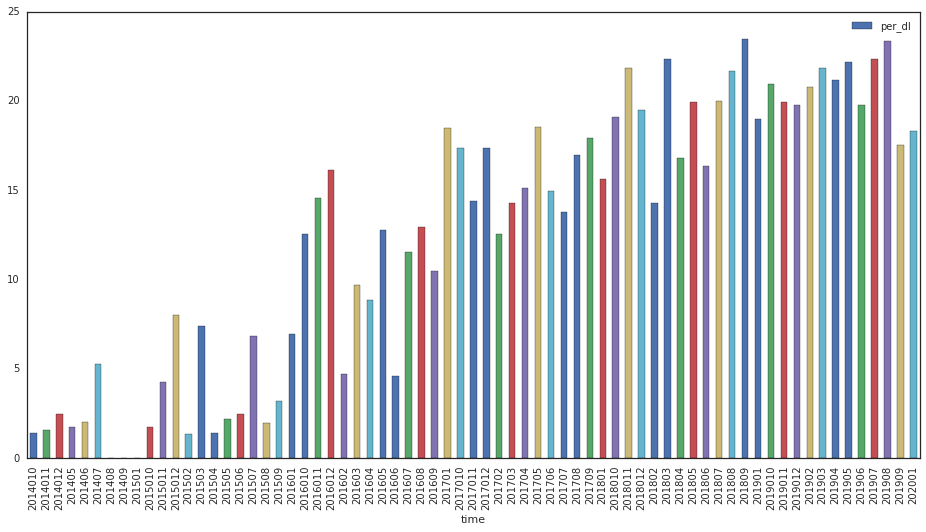

In [106]:
total_series = total[['time', 'per_dl']]
total_series.plot(kind= 'bar', x='time', y='per_dl', rot=90,
                  figsize = (16,8))

From the above graph, it's pretty obvious that Deep Learning became famous in the recent times.